In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib notebook

In [6]:
#Using LDA for dimensionality reduction
# input and output variables
from sklearn.datasets import load_iris

# loading the iris data
iris=load_iris()
X,y=iris.data,iris.target
names = iris.feature_names

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=321)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_model = LDA(n_components=2, solver='eigen', shrinkage=0.1)
lda_model.fit(X_train, y_train)

# testing the model
Y_pred = lda_model.predict(X_test)

accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_lda = round(lda_model.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print(classification_report(y_test, Y_pred))
print('Confusion matrix for LDA\n',cm)
print('accuracy_LDA: %.3f' %accuracy)
print('precision_LDA: %.3f' %precision)
print('recall_LDA : %.3f' %recall)
print('f1-score_LDA : %.3f' %f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion matrix for LDA
 [[6 0 0]
 [0 5 0]
 [0 0 4]]
accuracy_LDA: 1.000
precision_LDA: 1.000
recall_LDA : 1.000
f1-score_LDA : 1.000


In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Mean Root Squared Error: 0.0


<IPython.core.display.Javascript object>


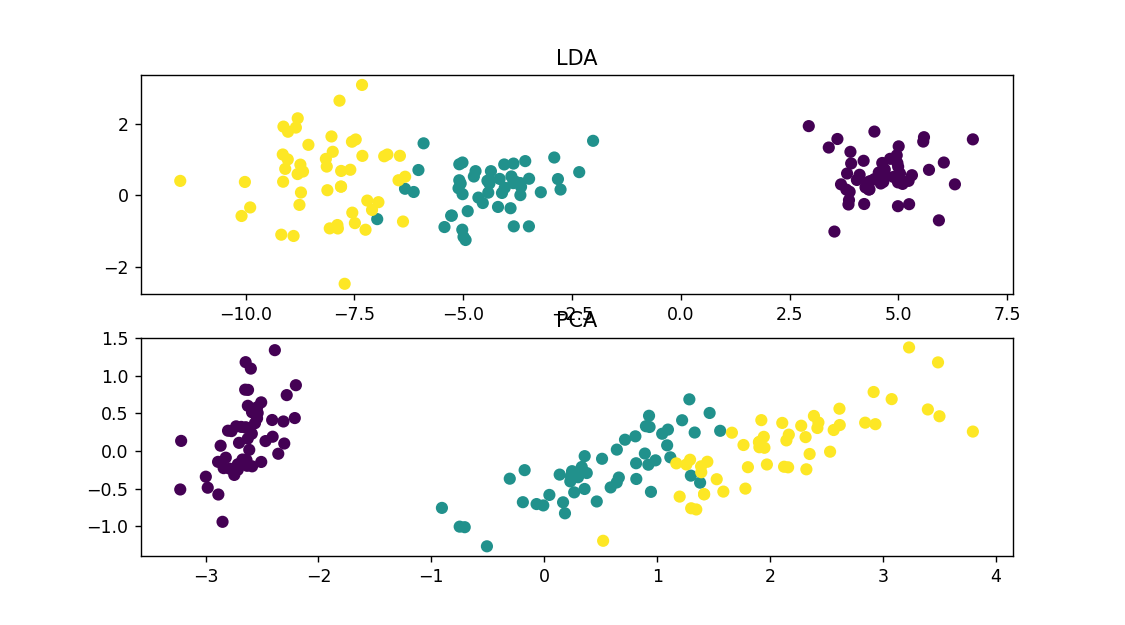

In [5]:
#Plotting the dataset
# importing the required module
import matplotlib.pyplot as plt

# plot size
plt.figure(figsize=(9, 5))
X_r2 = lda_model.fit(X, y).transform(X)
# plotting the graph
plt.scatter(X_r2[:,0],X_r2[:,1],  c=iris.target)
plt.show()

In [6]:
# importing the required moduel
from sklearn.decomposition import PCA

# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

In [7]:
#PCA vs LDA (Scatter plot)
# importing the module
from pylab import *

# subploting and title setting
subplot(2,1,2)
title("PCA")

# plotting the pca
plt.scatter(X_pca[:,0],X_pca[:,1], c=iris.target)

# subploting and title
subplot(2,1,1)
title("LDA")

# plotting LDA
plt.scatter(X_r2[:,0],X_r2[:,1], c=iris.target)
plt.show()

In [8]:
#Function to calculate Mean Square Error
def lst_sq(predictions, target):
    return 0.5 * np.sum((predictions - target)**2)

#Function to calculate weight using Stocastic Gradient Descent
def sgd_step(predictions, target, data, alpha=0.01):
    diff = predictions - target
    update = diff @ data
    w_new = w - alpha * update
    
    return w_new

In [9]:
#Split training data into batches (Each batch of size 32)
batch_size = 32
count = 100

X_train_batch = [X_train[i: i + batch_size] for i in range(0, len(X_train), batch_size)]
#print(X_train_batch)
y_train_batch = [y_train[j: j + batch_size] for j in range(0, len(y_train), batch_size)]
#print(y_train_batch)

In [10]:
#Define List of all possible pairs of input data

from itertools import combinations
#all_combinations = list(combinations(list(range(3, -1 , -1)), 2)) + list(combinations(list(range(4)),2))
all_combinations = list(combinations(list(range(4)),2))
print(all_combinations)




[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


<IPython.core.display.Javascript object>


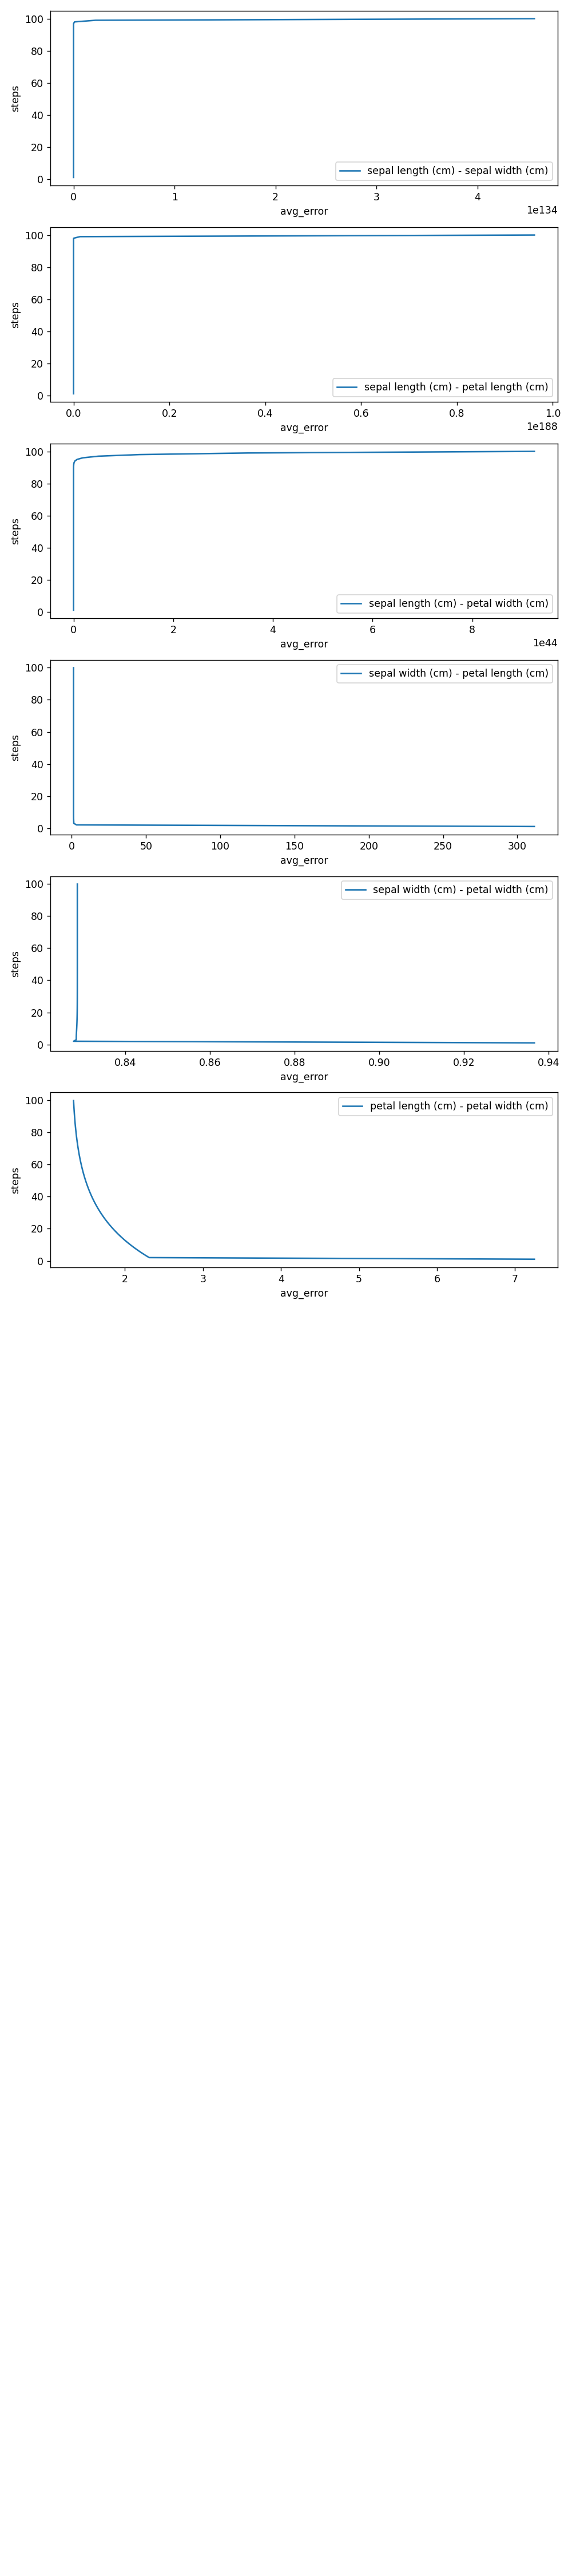

Test output for model : sepal length (cm) - sepal width (cm)
Error for testing dataset : 2.539677245043991e+134
Test output for model : sepal length (cm) - petal length (cm)
Error for testing dataset : 3.9533728671864874e+187
Test output for model : sepal length (cm) - petal width (cm)
Error for testing dataset : 3.305058937176796e+44
Test output for model : sepal width (cm) - petal length (cm)
Error for testing dataset : 0.3799558612753715
Test output for model : sepal width (cm) - petal width (cm)
Error for testing dataset : 0.16528797047504118
Test output for model : petal length (cm) - petal width (cm)
Error for testing dataset : 0.4199109637021789


In [11]:

fig = plt.figure(figsize=[8, 36])
for i, tup in enumerate(all_combinations):
    #Use random weights [w0 , w1] for each modal
    w = np.random.uniform(-1, 1, 2)
    ax = fig.add_subplot(12,1, i+1)
    ax.set_xlabel('avg_error')
    ax.set_ylabel('steps')
    error_avg_list = []
    
    for n in range(count):
        
        error_sum = 0
        for batch_index in range(len(X_train_batch)):
            batch_data = X_train_batch[batch_index][:, tup]
            batch_target = y_train_batch[batch_index]
            batch_y_hat = batch_data @ w
            batch_error = lst_sq(batch_y_hat, batch_target)
            error_sum += batch_error
            w = sgd_step(batch_y_hat, batch_target, batch_data, alpha=0.002)
        
        error_avg = error_sum/len(X_train_batch)
        error_avg_list.append(error_avg)
    
    #Testing the model 
    print('Test output for model : {}'.format(names[tup[0]] + ' - ' + names[tup[1]]))
    
    test_y_hat = X_test[:, tup] @ w
    test_error = lst_sq(test_y_hat, y_test)
    
    print('Error for testing dataset : {}'.format(test_error))
    
    ax.plot(error_avg_list, np.linspace(1, 100, 100), label=names[tup[0]] + ' - ' + names[tup[1]])
    ax.legend(loc='best')
            
fig.tight_layout()
fig.savefig('LDA_training_plot.png')